# Programación para *Data Science*

Unidad 4: Librerías científicas en Python - pandas
------------------------------------------------------

## Instrucciones de uso
A continuación se presentarán explicaciones y ejemplos de uso de la librería pandas. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

## Introducción

Pandas es una librería de Python que nos ofrece una interfaz de alto nivel para manipular y analizar datos. Podéis encontrar la documentación completa de la librería en el siguiente [enlace](http://pandas.pydata.org/pandas-docs/stable/).


### Primeros pasos

Para poder utilizar la librería, en primer lugar es necesario importarla:

In [1]:
# En la siguiente línea, importamos pandas y le damos un nombre más corto 
# para que nos sea más cómodo hacer las llamadas.
import pandas as pd
# Importamos también NumPy, ya que la usaremos en alguno de los ejemplos.
import numpy as np

### Estructuras de datos básicas

Pandas provee de tres estructuras de datos: la serie, el _dataframe_ y el panel. Veamos las características de cada una de ellas.

Una **serie** es un vector **unidimensional** con **etiquetas** en los ejes y datos **homogéneos**. 

Repasemos qué implican cada una de estas características con unos ejemplos.

La serie nos permite representar un conjunto de datos unidimensionales, por ejemplo, una lista de enteros, decimales o de cadenas de caracteres: 


In [2]:
print pd.Series([1, 1, 2, 3, 5])

0    1
1    1
2    2
3    3
4    5
dtype: int64


In [3]:
print pd.Series([1.5, 3.5, 4.75])

0    1.50
1    3.50
2    4.75
dtype: float64


Los datos de una serie tienen que ser homogéneos, es decir, tienen que ser del mismo tipo. En los ejemplos anteriores, la primera serie está formada por enteros (int64) mientras que la segunda contiene números en punto flotante (float).

De todos modos, si intentamos crear una serie con datos de diferentes tipos, podremos hacerlo, ya que pandas creará una serie con el tipo más general:


In [4]:
# Mezclamos enteros y floats, la serie es de tipo float.
print pd.Series([1, 2, 3.5])

0    1.0
1    2.0
2    3.5
dtype: float64


In [5]:
# Mezclamos enteros, floats y strings, la serie es de tipo object.
print pd.Series([1, 4.3, "data"])

0       1
1     4.3
2    data
dtype: object


Por último, la serie puede tener etiquetas, de manera que podemos acceder a los elementos de una serie tanto a partir de su índice como de su etiqueta.

In [6]:
# Creamos una serie etiquetada a partir de un diccionario.
s = pd.Series({"alice" : 2, "bob": 3, "eve": 5})
print s

# Accedemos a los elementos de la serie a partir de su etiqueta.
print s["alice"]

# Accedemos a los elementos de la serie a partir de su índice.
print s[0]

alice    2
bob      3
eve      5
dtype: int64
2
2


In [7]:
# Creamos una serie etiquetada a partir de dos vectores, uno con los datos y otro con las etiquetas.
print pd.Series([2, 3, 5], index = ["alice", "bob", "eve"])

alice    2
bob      3
eve      5
dtype: int64


La segunda estructura de datos de pandas que presentaremos es el dataframe.

Un **_dataframe_** es una tabla **bidimensional** con **etiquetas** en los ejes y datos potencialmente **heterogéneos**. El _dataframe_ es la estructura principal de trabajo con la librería pandas.

Veamos las características principales de un dataframe con algunos ejemplos.

A diferencia de una serie, un _dataframe_ es bidimensional:

In [8]:
print pd.DataFrame([[1, 2, 3], [4, 5, 6]])

   0  1  2
0  1  2  3
1  4  5  6


Al igual que la serie, el _dataframe_ puede tener etiquetas en los ejes y podemos utilizar diferentes sintaxis para incluir las etiquetas en el _dataframe_.

In [9]:
# Utilizamos un diccionario para definir cada columna y una lista para indicar las etiquetas de las filas.
d = {"alice" : [1953, 12, 3], "bob" : [1955, 11, 24], "eve" : [2011, 10, 10]}
print pd.DataFrame(d, index=["year", "month", "day"])

       alice   bob   eve
year    1953  1955  2011
month     12    11    10
day        3    24    10


In [10]:
# Utilizamos una lista de listas para introducir los datos y dos listas adicionales 
# para indicar las etiquetas de filas y las columnas.
a = [[1953, 12, 3], [1955, 11, 24], [2011, 10, 10]]
print pd.DataFrame(a, columns=["year", "month", "day"], index = ["alice", "bob", "eve"])

       year  month  day
alice  1953     12    3
bob    1955     11   24
eve    2011     10   10


Cada una de las columnas de un _dataframe_ puede tener tipos de datos distintos, dando lugar a _dataframes_ heterogéneos:

In [11]:
a = [[1953, "computer science", 3.5], [1955, "archeology", 3.8], [2011, "biology", 2.8]]
print pd.DataFrame(a, columns=["year", "major", "average grade"], index = ["alice", "bob", "eve"])

       year             major  average grade
alice  1953  computer science            3.5
bob    1955        archeology            3.8
eve    2011           biology            2.8


El panel es la tercera estructura de datos que pandas nos provee.

Un **panel** es una estructura de datos **tridimensional** que puede contener **etiquetas** en los ejes y puede ser **heterogénea**.

El panel es una estructura de datos menos usada en pandas, por lo que no dispone de algunas de las funciones que nos ofrecen la serie y el _dataframe_. 

Veamos un ejemplo sencillo de creación de un panel para representar una imagen.

In [12]:
img = [[[0, 0, 0], [0, 15, 0], [0, 0, 15], [15, 0, 0], [180, 180, 180]],
       [[200, 200, 200], [125, 1, 125], [100, 100, 2], [1, 152, 125], [15, 25, 20]]]

print pd.Panel(img, 
               minor_axis=["R", "G", "B"],                    # un píxel son 3 valores
               major_axis=["x"+str(i) for i in range(5)],     # la imagen tiene 5 píxeles en horizontal, etiquetados como 
                                                              # x0, x1, ..., x5
               items= ["y"+str(i) for i in range(2)])         # la imagen tiene 2 píxeles en vertical, etiquetados como
                                                              # y0, y1



<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5 (major_axis) x 3 (minor_axis)
Items axis: y0 to y1
Major_axis axis: x0 to x4
Minor_axis axis: R to B


Visualicemos gráficamente la imagen para entender mejor la representación escogida. La imagen tiene 2 filas y 5 columnas y para cada píxel utilizamos 3 valores numéricos para representar su color.

Populating the interactive namespace from numpy and matplotlib


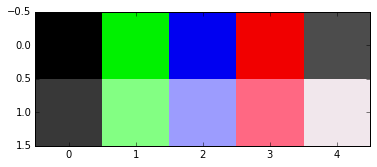

In [13]:
%pylab inline
from pylab import imshow
imshow(array(img, dtype=uint16), interpolation='nearest')

## Operaciones básicas sobre un _dataframe_

El _dataframe_ es la estructura más usada en pandas. Veamos algunas de las operaciones que podemos realizar con él.

### Lectura de datos de un fichero

Pandas nos permite cargar los datos de un fichero CSV directamente a un _dataframe_ a través de la función `read_csv`. Esta función es muy versátil y dispone de multitud de parámetros para configurar con todo detalle cómo realizar la importación. En muchas ocasiones, la configuración por defecto ya nos ofrecerá los resultados deseados.

Cargamos ahora los datos del fichero `marvel-wikia-data.csv`, que contiene datos sobre personajes de cómic de Marvel. El conjunto de datos fue creado por la web [FiveThirtyEight](https://fivethirtyeight.com/), que realiza artículos basados en datos sobre deportes y noticias, y que pone a disposición pública los [conjuntos de datos](https://github.com/fivethirtyeight/data) que recoge para sus artículos.

In [14]:
# Cargamos los datos del fichero "marvel-wikia-data.csv" en un dataframe.
data = pd.read_csv("data/marvel-wikia-data.csv")
print type(data)

<class 'pandas.core.frame.DataFrame'>


### Exploración del _dataframe_

Veamos algunas funciones que nos permiten explorar el _dataframe_ que acabamos de cargar.

In [15]:
# Mostrar las 3 primeras filas
data.head(n=3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043,Aug-62,1962
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360,Mar-41,1941
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061,Oct-74,1974


In [16]:
# Mostrar las etiquetas
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16366, 16367, 16368, 16369, 16370, 16371, 16372, 16373, 16374,
            16375],
           dtype='int64', length=16376)

In [17]:
# Mostrar estadísticos básicos de las columnas numéricas del dataframe
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


### Indexación y selección de datos


Podemos utilizar las expresiones habituales de Python (y NumPy) para seleccionar datos de _dataframes_ o bien usar los operadores propios de pandas. Estos últimos están optimizados, por lo que su uso es recomendado para trabajar con conjuntos de datos grandes o en situaciones donde la eficiencia sea crítica.

In [18]:
# Seleccionamos los nombres de los diez primeros personajes, es decir, mostramos la columna "name" de las diez primeras filas
# usando expresiones Python.
data["name"][0:10]

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
5             Benjamin Grimm (Earth-616)
6              Reed Richards (Earth-616)
7             Hulk (Robert Bruce Banner)
8              Scott Summers (Earth-616)
9             Jonathan Storm (Earth-616)
Name: name, dtype: object

In [19]:
# Seleccionamos el nombre, el estado de identidad y el color de pelo de los superhéroes 3 y 8
# usando el operador de acceso de pandas .loc
data.loc[[3,8], ["name", "ID", "HAIR"]]

,name,ID,HAIR
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Black Hair
8,Scott Summers (Earth-616),Public Identity,Brown Hair


In [20]:
# Seleccionamos filas según el género del superhéroe utilizando operadores binarios y expresiones Python.
male = data[data.SEX == "Male Characters"]
female = data[data.SEX == "Female Characters"]
print len(male)
print len(female)


11638
3837


In [21]:
# Combinamos operadores binarios para seleccionar los superhéroes con identidad secreta que han aparecido más
# de dos mil veces con expresiones Python.
secret_and_popular1 = data[(data.APPEARANCES > 1000) & (data.ID == "Secret Identity")]
print len(secret_and_popular1)
print secret_and_popular1["name"]


5
0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


In [22]:
# Utilizamos el método 'where' de pandas para obtener la misma información:
secret_and_popular2 = data.where((data.APPEARANCES > 1000) & (data.ID == "Secret Identity"))
# Notad que en este caso el resultado tiene el mismo tamaño que el 'dataframe' original: los valores no seleccionados
# muestran NaN.
print len(secret_and_popular2)
print secret_and_popular2["name"][0:10]

16376
0    Spider-Man (Peter Parker)
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
Name: name, dtype: object


In [23]:
# Podemos eliminar las filas que tengan todos los valores NaN, obteniendo así el mismo resultado que usando 
# operadores binarios. 
print secret_and_popular2.dropna(how="all")["name"]

0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


### Agregación de datos 

Pandas también permite crear grupos de datos a partir de los valores de una o más columnas y luego operar sobre los grupos creados. Veamos algunos ejemplos.

In [24]:
# Agrupamos el 'dataframe' en función de la alineación del superhéroe.
grouped = data.groupby("ALIGN")

# Visualizamos el nombre y el número de filas de cada grupo. 
for name, group in grouped:
    print name, len(group)
    

Bad Characters 6720
Good Characters 4636
Neutral Characters 2208


In [25]:
# Agrupamos el 'dataframe' en función de la alineación del superhéroe y de la ocultación de su identidad.
grouped = data.groupby(["ALIGN", "ID"])

# Visualizamos el nombre y el número de filas de cada grupo.
for name, group in grouped:
    print name, len(group)

('Bad Characters', 'Known to Authorities Identity') 3
('Bad Characters', 'No Dual Identity') 474
('Bad Characters', 'Public Identity') 1452
('Bad Characters', 'Secret Identity') 3223
('Good Characters', 'Known to Authorities Identity') 10
('Good Characters', 'No Dual Identity') 647
('Good Characters', 'Public Identity') 1628
('Good Characters', 'Secret Identity') 1613
('Neutral Characters', 'Known to Authorities Identity') 2
('Neutral Characters', 'No Dual Identity') 390
('Neutral Characters', 'Public Identity') 706
('Neutral Characters', 'Secret Identity') 818


In [26]:
# A partir de los datos agrupados, aplicamos la función de agregación np.mean (que calcula la media).
grouped.aggregate(np.mean)

page_id  APPEARANCES  \
ALIGN              ID                                                          
Bad Characters     Known to Authorities Identity   20762.666667    11.666667   
                   No Dual Identity               420196.056962    10.434211   
                   Public Identity                364450.002066    10.846815   
                   Secret Identity                272270.281415     8.895082   
Good Characters    Known to Authorities Identity   67293.700000    72.000000   
                   No Dual Identity               351762.737249    41.811570   
                   Public Identity                328621.391892    42.761401   
                   Secret Identity                209598.569746    37.098220   
Neutral Characters Known to Authorities Identity   25164.000000   180.500000   
                   No Dual Identity               448877.128205    24.430481   
                   Public Identity                405297.841360    22.266165   
                   Secret Identity                255694.179707    19.737113   

                                                         Year  
ALIGN              ID                                          
Bad Characters     Known to Authorities Identity  1991.666667  
                   No Dual Identity               1973.530806  
                   Public Identity                1973.381458  
                   Secret Identity                1984.200065  
Good Characters    Known to Authorities Identity  1994.100000  
                   No Dual Identity               1981.512195  
                   Public Identity                1982.214422  
                   Secret Identity                1990.303430  
Neutral Characters Known to Authorities Identity  1988.500000  
                   No Dual Identity               1983.160237  
                   Public Identity                1987.366322  
                   Secret Identity                1992.339818

In [27]:
# Recuperamos la información de un único grupo de interés.
grouped.get_group(("Neutral Characters", "Known to Authorities Identity"))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
106,18186,Venom (Symbiote) (Earth-616),\/Venom_(Symbiote)_(Earth-616),Known to Authorities Identity,Neutral Characters,Variable Eyes,No Hair,Agender Characters,NaN,Living Characters,348,May-84,1984
2668,32142,Obax Majid (Earth-616),\/Obax_Majid_(Earth-616),Known to Authorities Identity,Neutral Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,13,Sep-93,1993


### Escritura de datos a un fichero

De un modo análogo a cómo hemos cargado los datos de un fichero a un _dataframe_, podemos escribir los datos de un _dataframe_ en un fichero CSV.

In [28]:
# Creamos un 'dataframe' con los nombres de los superhéroes.
new_dataset = data[["name"]]
# Guardamos el nuevo 'dataframe' en un fichero, forzando la codificación a 'utf-8'.
new_dataset.to_csv("marvel-wikia-data-reduced.csv", encoding='utf-8')
